# Introduction to Machine Learning
created by Ari Sulistiyo Prabowo

This notebook is created to teach student about an advanced statistic. All the code is free to reuse by everyone.

**Contents**
- Data Preparation
- Exploratory Data Analysis
- Data Preprocessing
- Prediction
- Result
_____

In [59]:
# Library 
import pandas as pd
import numpy as np

#matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#import sklearn
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [28]:
data = pd.read_csv("https://raw.githubusercontent.com/densaiko/data_science_learning/main/dataset/Loan%20Prediction")
data.head()

,Unnamed: 0,Unnamed: 0.1,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,1,1,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,2,2,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,3,3,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,4,4,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1


## **Data Preparation**

### Check any missing value

In [30]:
#exclude the unnamed variable
data = data.iloc[:, 2:]

#show null values and its percentage
null_val = pd.DataFrame(data.dtypes).T.rename(index = {0:'Columns Type'})
null_val = null_val.append(pd.DataFrame(data.isnull().sum()).T.rename(index = {0:'Amount of Null Values'}))
null_val = null_val.append(pd.DataFrame(round(data.isnull().sum()/data.shape[0]*100,2)).T.rename(index = {0:'Percentage of Null Values'}))
null_val

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Columns Type,object,object,object,object,object,object,int64,float64,float64,float64,float64,object,int64
Amount of Null Values,0,10,1,9,0,29,0,0,16,13,43,0,0
Percentage of Null Values,0,2.04,0.2,1.83,0,5.91,0,0,3.26,2.65,8.76,0,0


### Take care any missing value with imputer

In [31]:
#impute the missing values
#categorical variable + binary variable
cat_var = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Self_Employed','Credit_History']
most_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
for i in cat_var:
  most_imputer = most_imputer.fit(data[[i]])
  data[i] = most_imputer.transform(data[[i]]).ravel()

#numerical variable
num_var = ['LoanAmount','Loan_Amount_Term']
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
for i in num_var:
  mean_imputer = mean_imputer.fit(data[[i]])
  data[i] = mean_imputer.transform(data[[i]]).ravel()

data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## **Exploratory Data Analysis**

### Numerical Variables

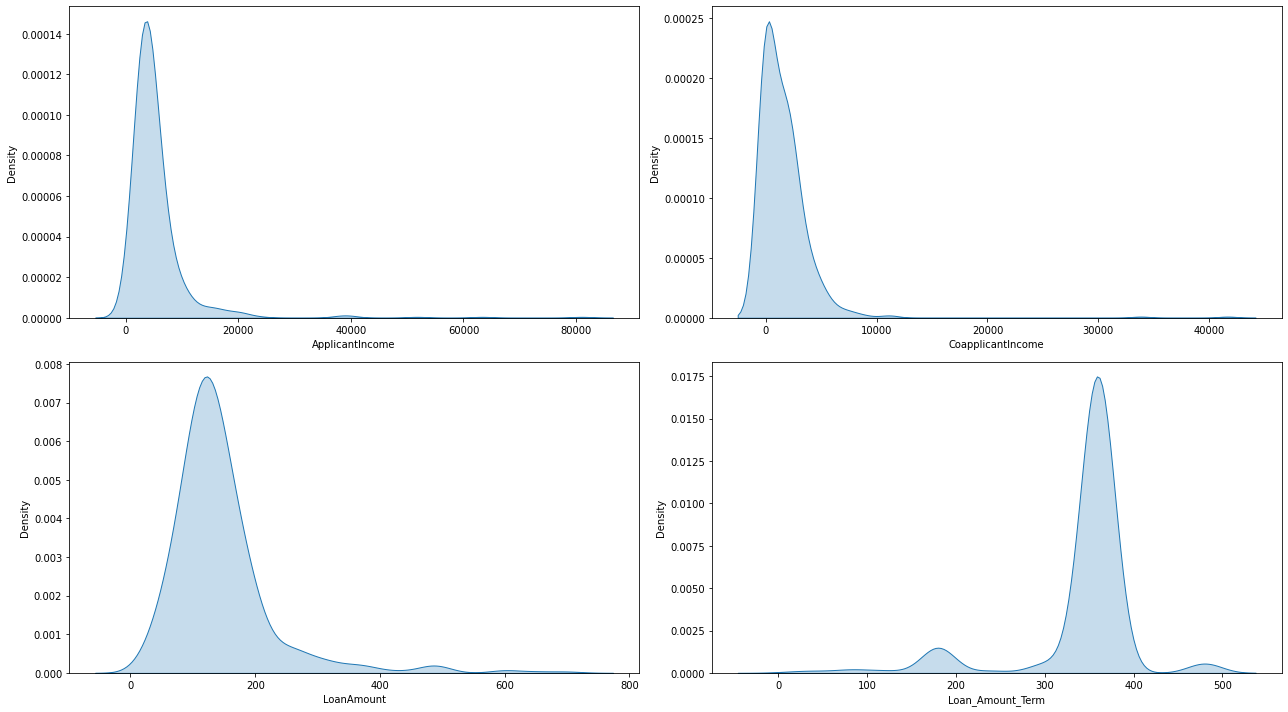

In [35]:
num_cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
fig, axes = plt.subplots(2,2, figsize=(18,10))
axes = [ax for axes_row in axes for ax in axes_row]

for i, col in enumerate(num_cols):
  plot = sns.kdeplot(data=data, x=col, ax=axes[i], fill=True)
plt.tight_layout()

### Categorical Variable

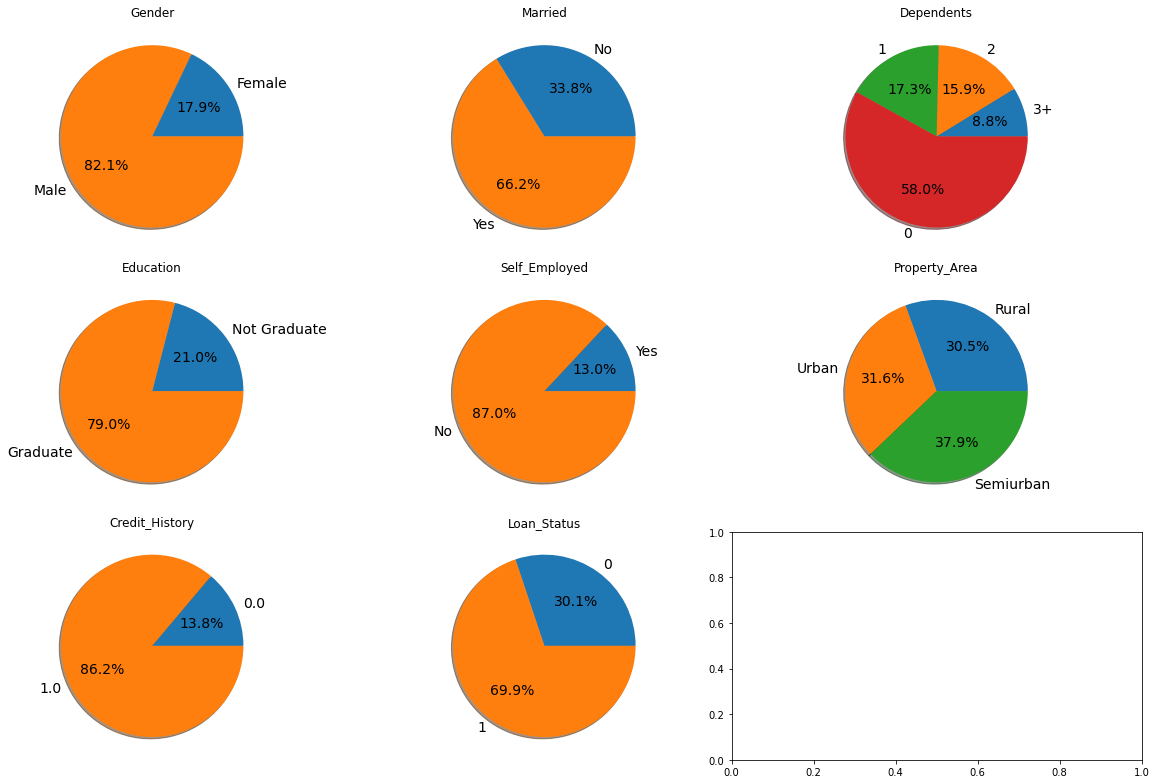

In [36]:
cat_cols = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area',
            'Credit_History', 'Loan_Status']

fig, axes = plt.subplots(3,3, figsize=(17,11))
axes = [ax for axes_row in axes for ax in axes_row]

for i, col in enumerate(cat_cols):
  _ = data[col].value_counts()[::-1].plot(kind='pie',ax=axes[i], title=col, autopct='%1.1f%%', shadow=True, fontsize=14)
  _ = axes[i].set_ylabel('')

_ = plt.tight_layout()


### Correlation

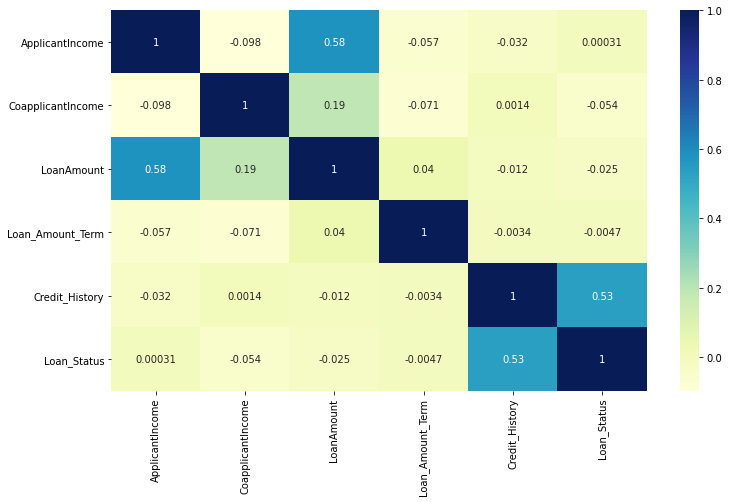

In [37]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')
plt.show()

## **Data Preprocessing**

In [45]:
#performing one-hot encoding
print('Before doing one-hot encoding',data.shape)
data_dumm = pd.get_dummies(data, prefix_sep='_')
print('Before doing one-hot encoding',data_dumm.shape)
data_dumm.head()

Before doing one-hot encoding (491, 13)
Before doing one-hot encoding (491, 512)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001011,Loan_ID_LP001013,Loan_ID_LP001014,Loan_ID_LP001018,Loan_ID_LP001020,Loan_ID_LP001024,Loan_ID_LP001027,Loan_ID_LP001030,Loan_ID_LP001032,Loan_ID_LP001034,Loan_ID_LP001036,Loan_ID_LP001038,Loan_ID_LP001041,Loan_ID_LP001046,Loan_ID_LP001052,Loan_ID_LP001066,Loan_ID_LP001068,Loan_ID_LP001073,Loan_ID_LP001086,Loan_ID_LP001087,Loan_ID_LP001091,Loan_ID_LP001095,Loan_ID_LP001097,Loan_ID_LP001100,Loan_ID_LP001106,Loan_ID_LP001112,Loan_ID_LP001114,Loan_ID_LP001120,Loan_ID_LP001123,Loan_ID_LP001131,...,Loan_ID_LP002894,Loan_ID_LP002898,Loan_ID_LP002911,Loan_ID_LP002912,Loan_ID_LP002916,Loan_ID_LP002917,Loan_ID_LP002925,Loan_ID_LP002928,Loan_ID_LP002931,Loan_ID_LP002936,Loan_ID_LP002938,Loan_ID_LP002941,Loan_ID_LP002943,Loan_ID_LP002945,Loan_ID_LP002949,Loan_ID_LP002950,Loan_ID_LP002953,Loan_ID_LP002960,Loan_ID_LP002961,Loan_ID_LP002964,Loan_ID_LP002974,Loan_ID_LP002978,Loan_ID_LP002979,Loan_ID_LP002983,Loan_ID_LP002990,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,4547,0.0,115.0,360.000000,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0
1,5703,0.0,130.0,360.000000,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,1,0,0
2,4333,2451.0,110.0,360.000000,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,1
3,4695,0.0,96.0,341.297071,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,6700,1750.0,230.0,300.000000,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0


In [50]:
#Separate the target and independent variable
X = data_dumm.drop(columns='Loan_Status')
y = data_dumm['Loan_Status']

#Perform train test split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

## **Training**

In [52]:
import warnings
warnings.filterwarnings('ignore')

In [53]:
lr = LogisticRegression().fit(X_train, y_train)
print('Training Accuracy {:.2f}%'.format(lr.score(X_train, y_train)*100))
print('Testing Accuracy {:.2f}%'.format(lr.score(X_test, y_test)*100))

Training Accuracy 82.34%
Testing Accuracy 77.24%


In [56]:
prediction = lr.predict(X_test)
result = pd.DataFrame(prediction)
result.index = X_test.index
result.columns = ['prediction']
result['Y_test'] = y_test
result.head(10)

,prediction,Y_test
88,1,1
466,1,1
129,1,0
431,1,1
315,1,1
151,1,0
211,0,0
434,0,0
316,0,0
146,1,1


## **BONUS - MODEL EVALUATION**

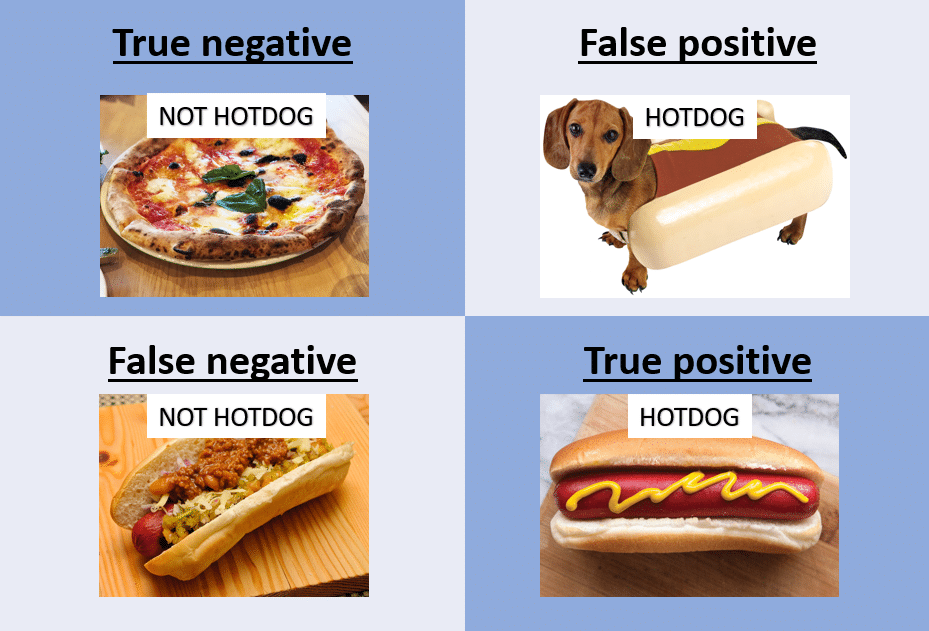

In [65]:
tn, fp, fn, tp = confusion_matrix(y_test, prediction).ravel()

In [70]:
confusion_matrix(y_test, prediction)

array([[19, 22],
       [ 6, 76]])